#Overview
The overall goal of this project is to compare the performance of the classifiers (k-nearest neighbors, logistic regression, decision trees, and support vector machines). The dataset used is related to the marketing of bank products over the telephone.



# Data
The dataset used for this project came from the UC Irvine Machine Learning Repository. The data is from a Portuguese banking institution and is a collection of the results of multiple marketing campaigns.

# Deliverables
After understanding, preparing, and modeling the data, a Jupyter Notebook was developed that includes a clear statement demonstrating the business problem, a correct and concise interpretation of descriptive and inferential statistics, major findings (including actionable insights), and next steps and recommendations.

#Importing Packages

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import warnings, sys
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

#from google.colab import drive
#drive.mount('/content/drive')

In [9]:
pwd

'/Users/nchatterjee/Desktop/Berkley_ML/Modules/Module_17'

# Importing Datasets

In [20]:
import os
import pandas as pd

# Get the environment variable, or default to a hard-coded path if it's not set
base_dir = os.environ.get('DATA_DIR', '/Users/nchatterjee/Desktop/Berkley_ML/Modules/Module_17')

# Build your file paths using `os.path.join`
df_addtnl_fll = pd.read_csv(os.path.join(base_dir, 'bank-additional-full.csv'), sep=';')
df_addtnl = pd.read_csv(os.path.join(base_dir, 'bank-additional.csv'), sep=';')
df_fll = pd.read_csv(os.path.join(base_dir, 'bank-full.csv'), sep=';')
df_ = pd.read_csv(os.path.join(base_dir, 'bank.csv'), sep=';')


In [21]:
df_addtnl_fll.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [22]:
df_addtnl.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


#Exploratory Data Analysis

## Checking the info on the dataset

In [14]:
df_addtnl_fll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [15]:
df_addtnl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

## Checking unique values in each column

In [16]:
df_addtnl_fll.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [17]:
df_addtnl.nunique()

age                67
job                12
marital             4
education           8
default             3
housing             3
loan                3
contact             2
month              10
day_of_week         5
duration          828
campaign           25
pdays              21
previous            7
poutcome            3
emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         234
nr.employed        11
y                   2
dtype: int64

In [18]:
# Creating numerical columns
num_cols = df_addtnl_fll.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Creating categorical columns
cat_cols = df_addtnl_fll.select_dtypes(include=['object']).columns.tolist()

## Univariate analysis of numerical columns

In [10]:
#Checking summary statistics
df_addtnl_fll[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


**Observations:**
*   The average age of the client is **40** years old. It has a high range, from 17 to 98 years of age, indicating good range diversity in the age of clients.
*   The last contact duration of the call was 258 seconds (around 4 minutes).
*   The median value for the number of contacts performed per client is around 2 minutes which means that multiple calls are made to each client.
*   The columns 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euroibor3m', and 'nr.employed' would not add much value to the analysis and the model, so these columns could be **dropped**.





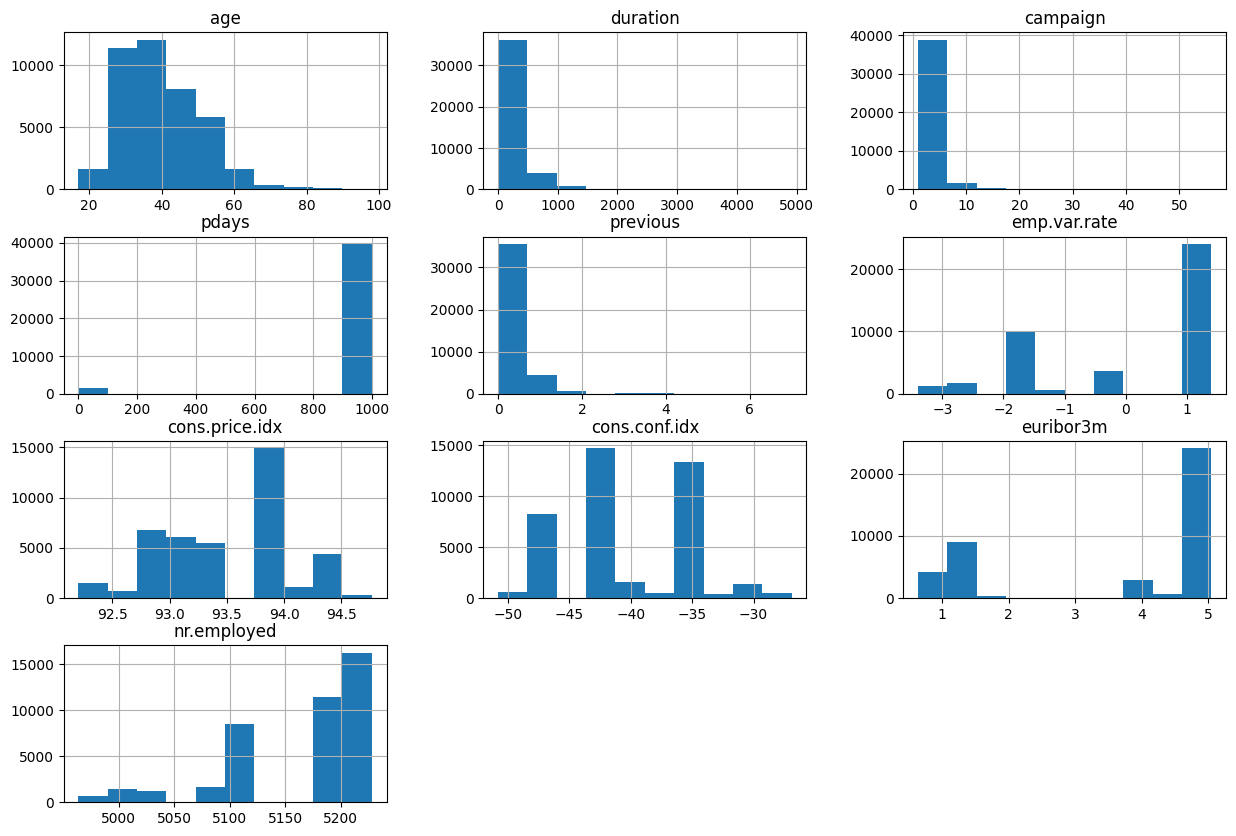

In [11]:
# Creating histograms
df_addtnl_fll[num_cols].hist(figsize=(15, 10))
plt.show()

**Observations:**
*   The histogram of the age column suggests that majority of the clients are in the age range of **30 to 50**.
*   The majority of the calls are shorter than **6 minutes**, and number of contacts performed during this campaign were last 10 for majority of the clients.
*   The number of days that passed after the client was last contact from a previous campaign was either **1 or 1000**. The number of days distribution between these 1 and 1000 is sparse.


## Univariate analysis for categorical variable

In [12]:
df_addtnl_fll.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [13]:
# Printing the %sub categories of each category
for i in cat_cols:
  print(df_addtnl_fll[i].value_counts(normalize=True)*100)
  print('-'*40)

job
admin.           25.303486
blue-collar      22.467709
technician       16.371273
services          9.636302
management        7.099155
retired           4.175974
entrepreneur      3.535010
self-employed     3.450034
housemaid         2.573565
unemployed        2.461882
student           2.124405
unknown           0.801204
Name: proportion, dtype: float64
----------------------------------------
marital
married     60.522482
single      28.085850
divorced    11.197436
unknown      0.194231
Name: proportion, dtype: float64
----------------------------------------
education
university.degree      29.542585
high.school            23.101389
basic.9y               14.676605
professional.course    12.729436
basic.4y               10.138875
basic.6y                5.564728
unknown                 4.202680
illiterate              0.043702
Name: proportion, dtype: float64
----------------------------------------
default
no         79.120132
unknown    20.872584
yes         0.007284
Name: pro

**Observations:**
*   Day of the week has equal distribution across all days.
*   Most of the calls are made in May which could indicate that it is the time of the year when new campaigns are introduced.
*   Around **63%** of the communication over the cellular phone.
*   There was only **3%** success rate from the previous marketing campaign.



## Summary of EDA

Observations:
*   There are 41,188 rows in the main dataframe, and 20 classifiers.
*   All the columns have 0 null values, i.e., there is no missing values in the data.
*   The columns 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euroibor3m', and 'nr.employed' would not add much value to the analysis and the model, so these columns could be **dropped**.
*   The 'bank-additional' dataset was also used for the modeling purposes in cases such as hyperparameter tuning because those processes are computationally expensive. In such instances, it would make sense to use a smaller dataset.
*   The columns 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euroibor3m', and 'nr.employed' were also dropped from the the 'bank-additional' dataset.



In [14]:
df_model_bnk = df_addtnl_fll.drop(
    ['pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], axis = 1)

df_model_bnk_small = df_addtnl.drop(
    ['pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], axis = 1)

# Model Building

## Approach
1.   Data Preparation.
2.   Parition the data into a train and test set.
3.   Build a model on the train data.
4.   Tune the model if required.
5.   Test the data on the test set.

**Creating dummy variables for the categorical variables**

In [15]:
# Creating a list of columns for which we will create dummy variables
to_get_dummies_for = cat_cols.copy()
to_get_dummies_for.remove('y')

# Creating dummy variables
df_model_bnk = pd.get_dummies(data = df_model_bnk, columns = to_get_dummies_for, drop_first = True, dtype = int)
df_model_bnk_small = pd.get_dummies(data = df_model_bnk_small, columns = to_get_dummies_for, drop_first = True, dtype = int)

# Mapping subscription
df_model_bnk['y'] = df_model_bnk['y'].map({'yes': 1, 'no': 0})
df_model_bnk_small['y'] = df_model_bnk_small['y'].map({'yes': 1, 'no': 0})

**Separating the independent variables (X) and the dependent variable (Y)**

In [16]:
#Separating the target variable and other variables
Y = df_model_bnk['y']
X = df_model_bnk.drop(['y'], axis = 1)

Y_small = df_model_bnk_small['y']
X_small = df_model_bnk_small.drop(['y'], axis = 1)

**Splitting the data into 70% train and 30% test data**

In [17]:
# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

x_train_small, x_test_small, y_train_small, y_test_small = train_test_split(X_small, Y_small, test_size = 0.3, random_state = 1, stratify = Y_small)

In [18]:
# Creating metric functions

def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Not Subscribing', 'Subscribing'], yticklabels = ['Not Subscribing', 'Subscribing'])
    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier

    predictors: independent variables

    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    recall = recall_score(target, pred,average = 'macro')                 # To compute recall

    precision = precision_score(target, pred, average = 'macro')              # To compute precision

    acc = accuracy_score(target, pred)                                 # To compute accuracy score


    # Creating a dataframe of metrics

    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },

        index = [0],
    )

    return df_perf

**Investigating different models**

In [19]:
df_model_bnk['y'].value_counts(normalize=True)

,proportion
y,
0,0.887346
1,0.112654


In [20]:
df_model_bnk_small['y'].value_counts(normalize=True)

,proportion
y,
0,0.890507
1,0.109493


**Building a Decision Tree Model**
*   The model for Decision Tree will be built using **DecisionTreeClassifier** function, and full data will be used for it.
*   If the frequency of yes in the dataset is **11%**, and no is **89%**, then class no will become dominant class and th decision tree will become biased toward the dominant class.
*   **class_weight** is a hyperparameter for the decision tree classifier, and in this case, we can pass a dictionary {0:0.11, 1:0.89} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.




In [21]:
#Building the decision tree model
dt = DecisionTreeClassifier(class_weight = {0:0.89, 1:0.11}, random_state = 1)

In [22]:
# Fitting decision tree model
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.89, 1: 0.11}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25583
           1       1.00      1.00      1.00      3248

    accuracy                           1.00     28831
   macro avg       1.00      1.00      1.00     28831
weighted avg       1.00      1.00      1.00     28831



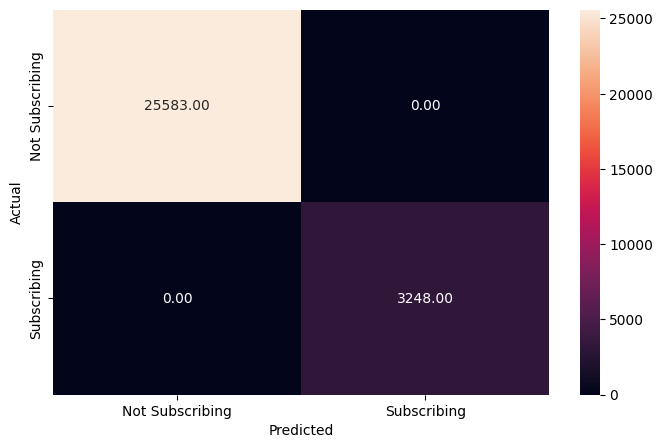

In [23]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

Observation:
*   The Decision tree is giving a **100% score** for all metrics on the training dataset.



              precision    recall  f1-score   support

           0       0.94      0.92      0.93     10965
           1       0.45      0.50      0.47      1392

    accuracy                           0.88     12357
   macro avg       0.69      0.71      0.70     12357
weighted avg       0.88      0.88      0.88     12357



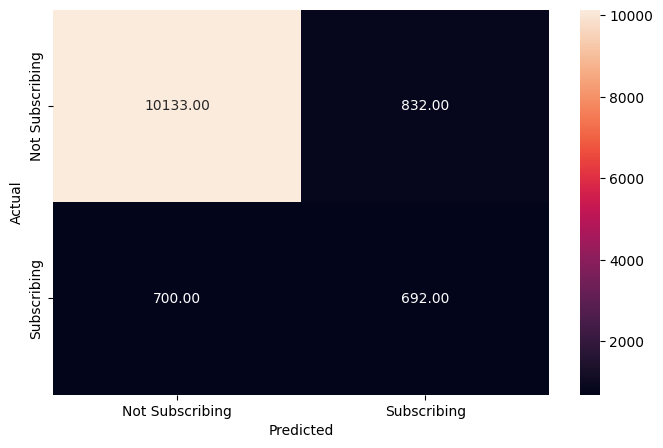

In [24]:
# Checking the performance on the test dataset
y_test_pred_dt = dt.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

In [25]:
dtree_perf = model_performance_classification(dt, x_test, y_test)
dtree_perf

,Precision,Recall,Accuracy
0,0.694725,0.710624,0.876022


Observations:
*   The Decision Tree works well on the training data but **not** so well on the **test data** as the recall is 0.71 in comparison to 1 for the training dataset, i.e., the Decision Tree is **overfitting** the training data.
*   The precision on the test data suggests that there is a 31% chance that model will predict that a person is going to subscribe even though he/she would not, and **the company may waste their time and energy on these employees who are not subscribing.**


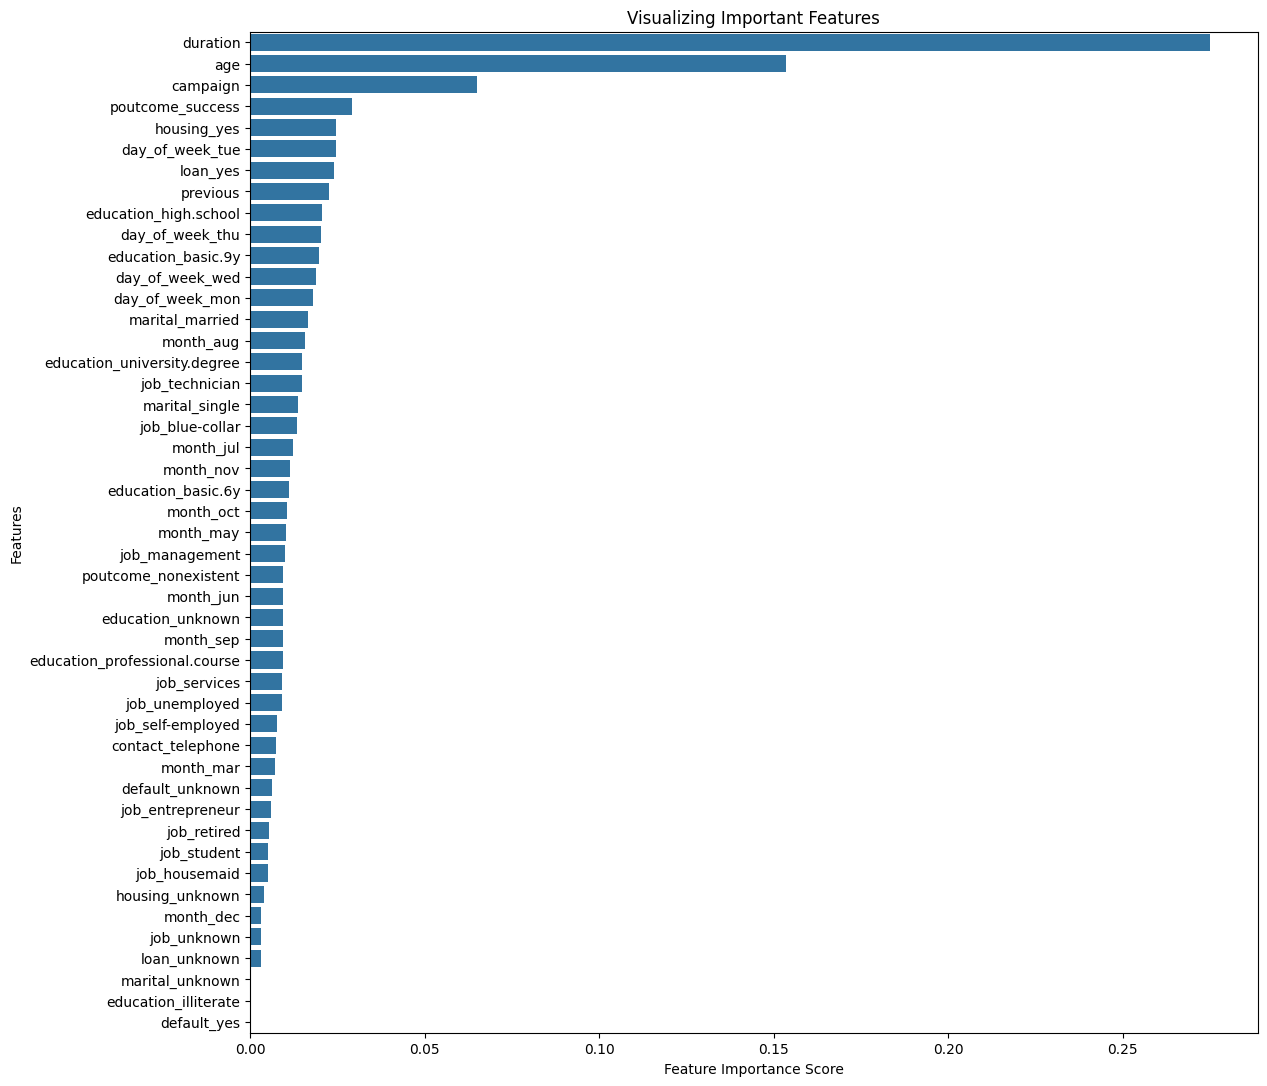

In [26]:
# Plot the feature importance

importances = dt.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x=importance_df.Importance,y=importance_df.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

Observations:
*   According to the decision tree, duration of the call is the most important feature, followed by Age.
*   This might signify that clients who spend more time on the call are most likely to get the subscription.



## Tuning Models
### Using GridSearch for Hyperparameter Tuning


*   Since this process is computationally expensive, full dataset will not be used for this process.



In [27]:
# Choose the type of classifier
dtree_estimator = DecisionTreeClassifier(class_weight = {0: 0.89, 1: 0.11}, random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(x_train_small, y_train_small)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
dtree_estimator.fit(x_train_small, y_train_small)

DecisionTreeClassifier(class_weight={0: 0.89, 1: 0.11}, max_depth=6,
                       min_samples_leaf=10, random_state=1)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2567
           1       1.00      0.11      0.19       316

    accuracy                           0.90      2883
   macro avg       0.95      0.55      0.57      2883
weighted avg       0.91      0.90      0.87      2883



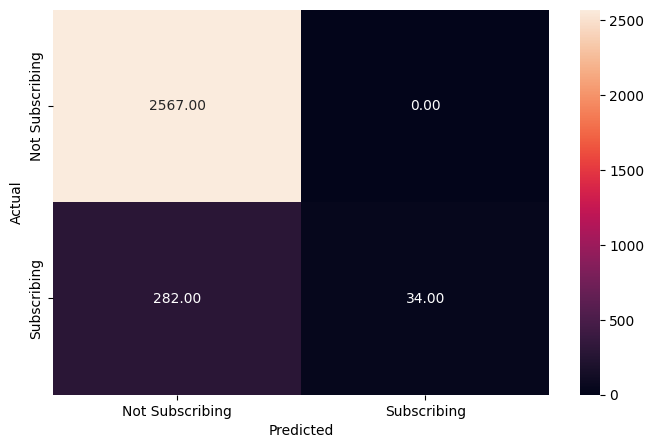

In [28]:
# Checking performance on the training dataset
y_train_pred_dt = dtree_estimator.predict(x_train_small)

metrics_score(y_train_small, y_train_pred_dt)

**Observation:**
*  In comparison to the model with default values of hyperparameters, **the performance on the training set has gone down significantly.**



              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1101
           1       0.75      0.09      0.16       135

    accuracy                           0.90      1236
   macro avg       0.82      0.54      0.55      1236
weighted avg       0.88      0.90      0.86      1236



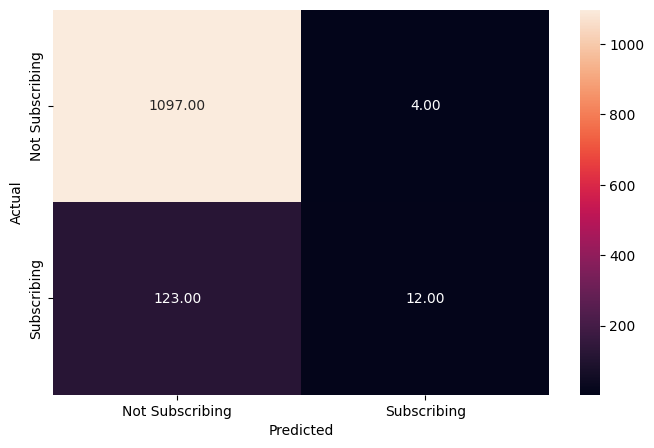

In [29]:
# Checking performance on the test dataset
y_test_pred_dt = dtree_estimator.predict(x_test_small)

metrics_score(y_test_small, y_test_pred_dt)

In [30]:
dtree_tuned_test = model_performance_classification(dtree_estimator,x_test_small,y_test_small)
dtree_tuned_test

,Precision,Recall,Accuracy
0,0.82459,0.542628,0.897249


**Observations:**

- The tuned model is not performing well in comparison to the model with default values of hyperparameters.
- This model is not overfitting the training data and giving approximately the same result on the test and train datasets.
- Precision has gone up significantly from .69 to .83 in comparison to the previous model which means the tuned model will give a less number of false positives.

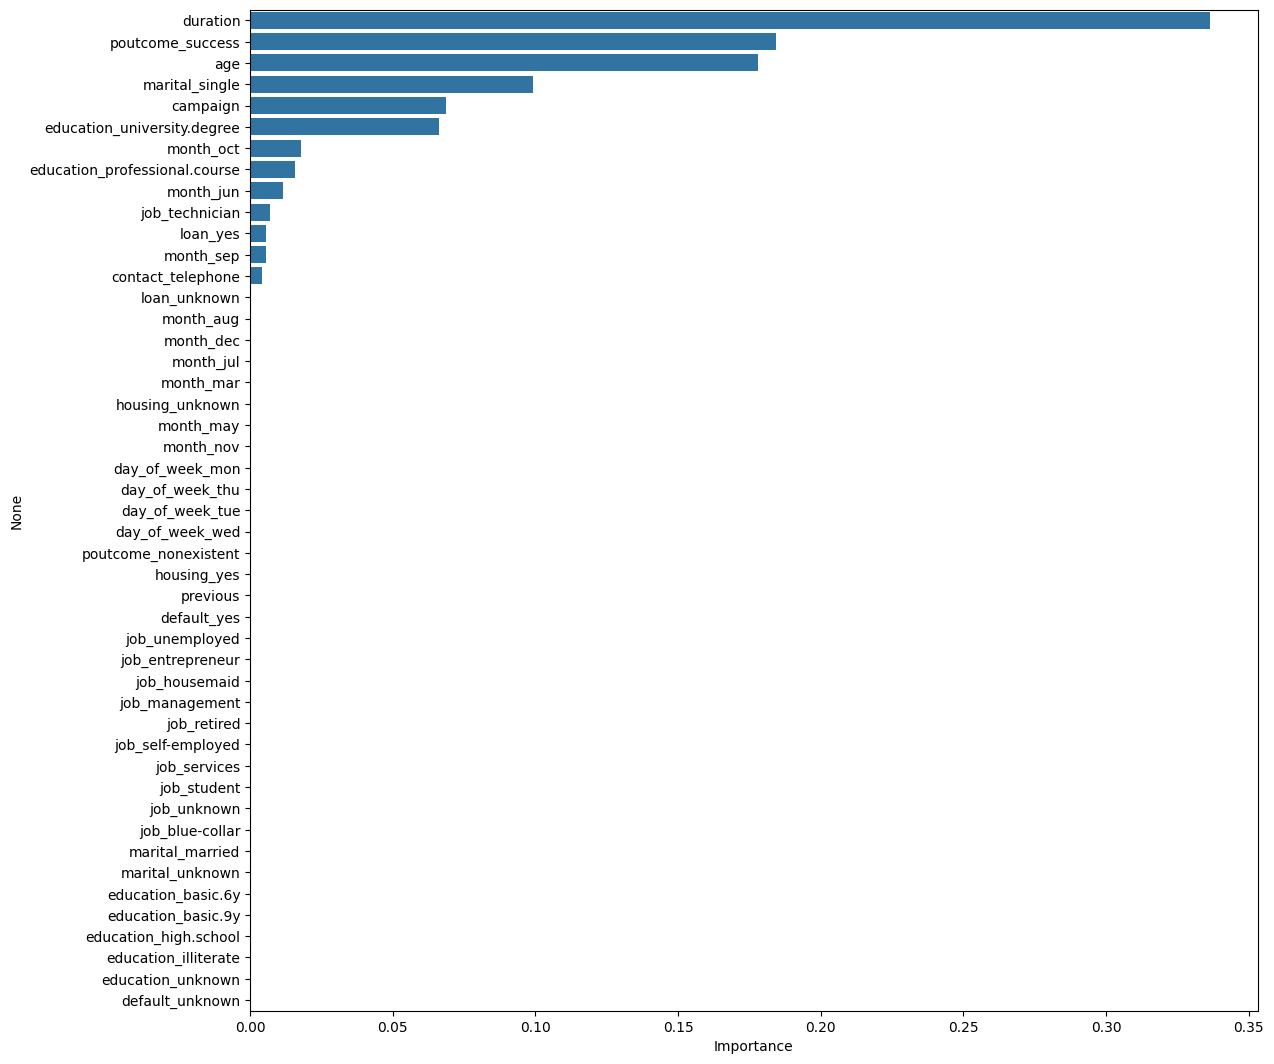

In [31]:
importances = dtree_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x=importance_df.Importance, y=importance_df.index);

**Observations:**

- According to this model too, `duration`, `poutcome`, and `Age` are the 3 most important features that describe why a client will take the subscription.

# Random Forest Classifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25583
           1       1.00      1.00      1.00      3248

    accuracy                           1.00     28831
   macro avg       1.00      1.00      1.00     28831
weighted avg       1.00      1.00      1.00     28831



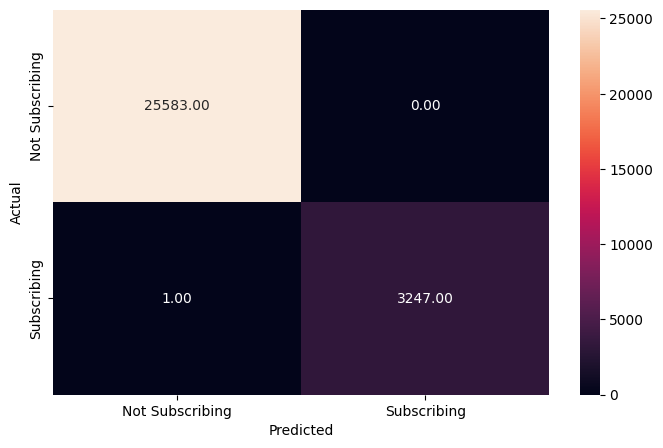

In [32]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.89, 1: 0.11}, random_state = 1)

rf_estimator.fit(x_train, y_train)

# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(x_train)

metrics_score(y_train, y_pred_train_rf)

**Observation:**

- The Random Forest is giving a **100% score for all metrics on the training dataset.**

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10965
           1       0.65      0.41      0.50      1392

    accuracy                           0.91     12357
   macro avg       0.79      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357



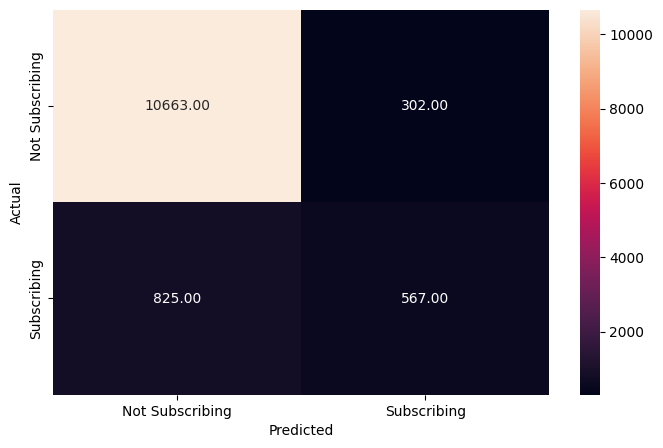

In [33]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(x_test)

metrics_score(y_test, y_pred_test_rf)

In [34]:
rf_estimator_test = model_performance_classification(rf_estimator,x_test,y_test)
rf_estimator_test

,Precision,Recall,Accuracy
0,0.79033,0.689893,0.908797


**Observations:**

- The Random Forest classifier **seems to be overfitting the training data**. The recall on the training data is 1, while the recall on the test data is only ~ 0.70 for class 1.
- Precision is high for the test data as well.

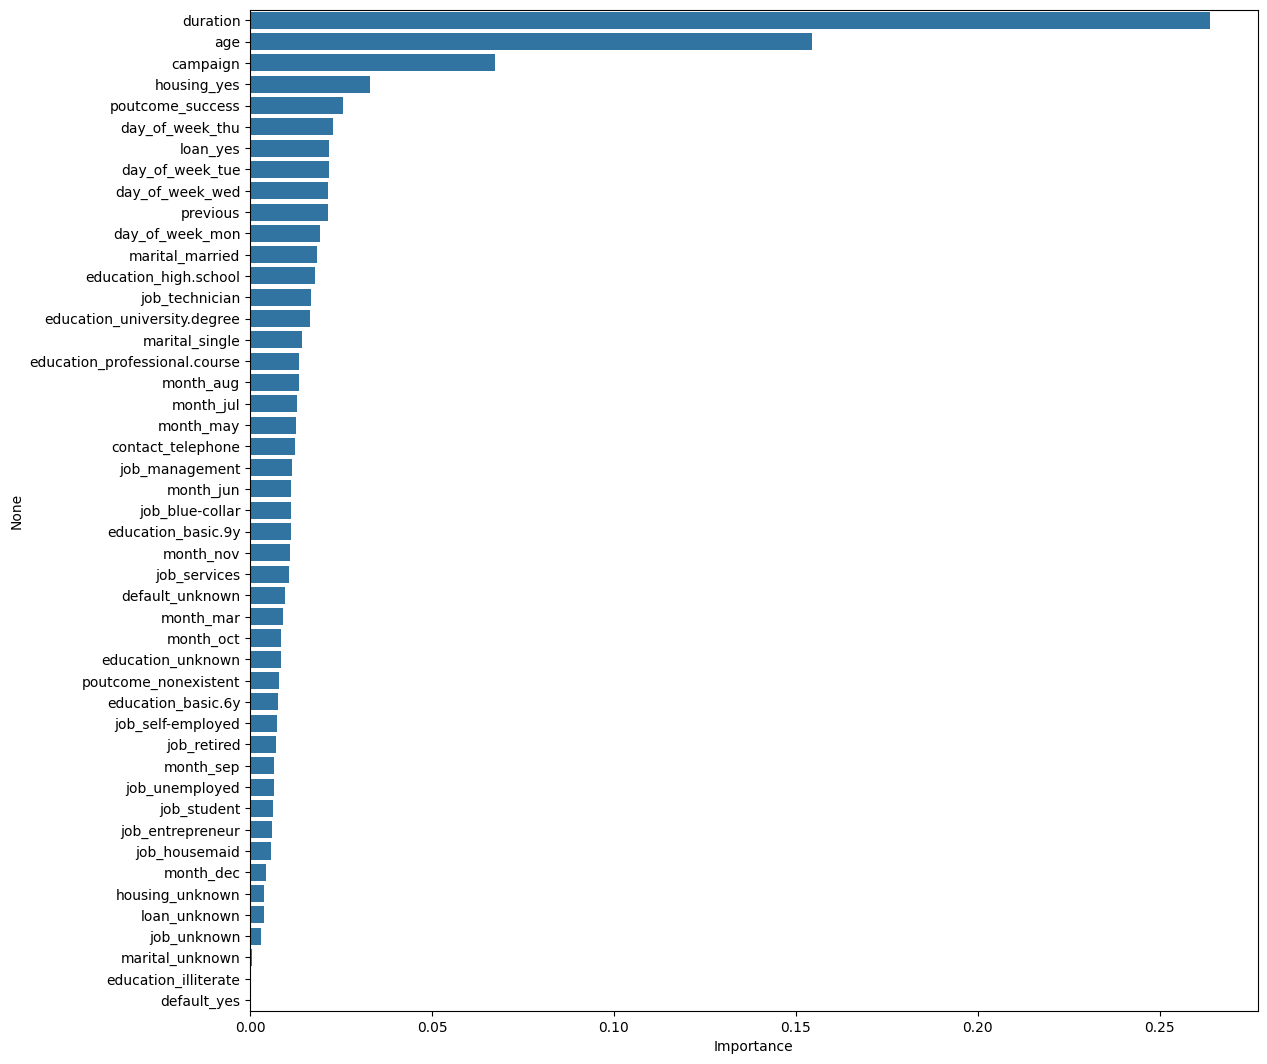

In [35]:
#Feature importance of the Random Forest
importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x=importance_df.Importance, y=importance_df.index);

**Observations:**
- The Random Forest further verifies the results from the decision tree that the most important features are `duration`, `Age`, `campaign`.

In [36]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.89, 1: 0.11}, random_state = 1)

# Grid of parameters to choose from
params_rf = {
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train_small, y_train_small)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2567
           1       1.00      1.00      1.00       316

    accuracy                           1.00      2883
   macro avg       1.00      1.00      1.00      2883
weighted avg       1.00      1.00      1.00      2883



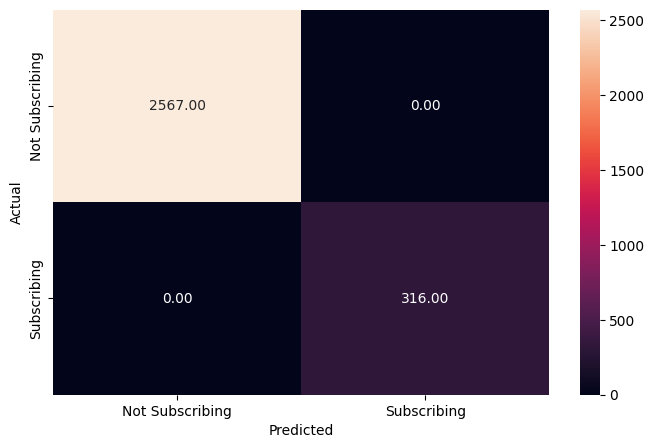

In [37]:
rf_estimator_tuned.fit(x_train_small, y_train_small)

# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(x_train_small)

metrics_score(y_train_small, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1101
           1       0.53      0.47      0.50       135

    accuracy                           0.90      1236
   macro avg       0.73      0.71      0.72      1236
weighted avg       0.89      0.90      0.89      1236



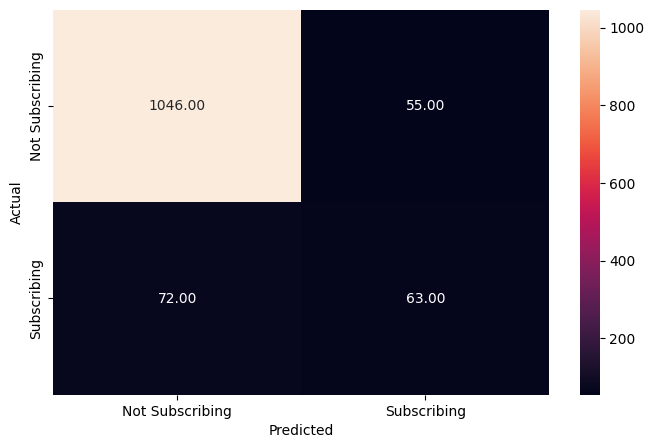

In [38]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(x_test_small)

metrics_score(y_test_small, y_pred_test_rf_tuned)

In [39]:
rf_estimator_tuned_test = model_performance_classification(rf_estimator_tuned, x_test_small, y_test_small)
rf_estimator_tuned_test

,Precision,Recall,Accuracy
0,0.734749,0.708356,0.897249


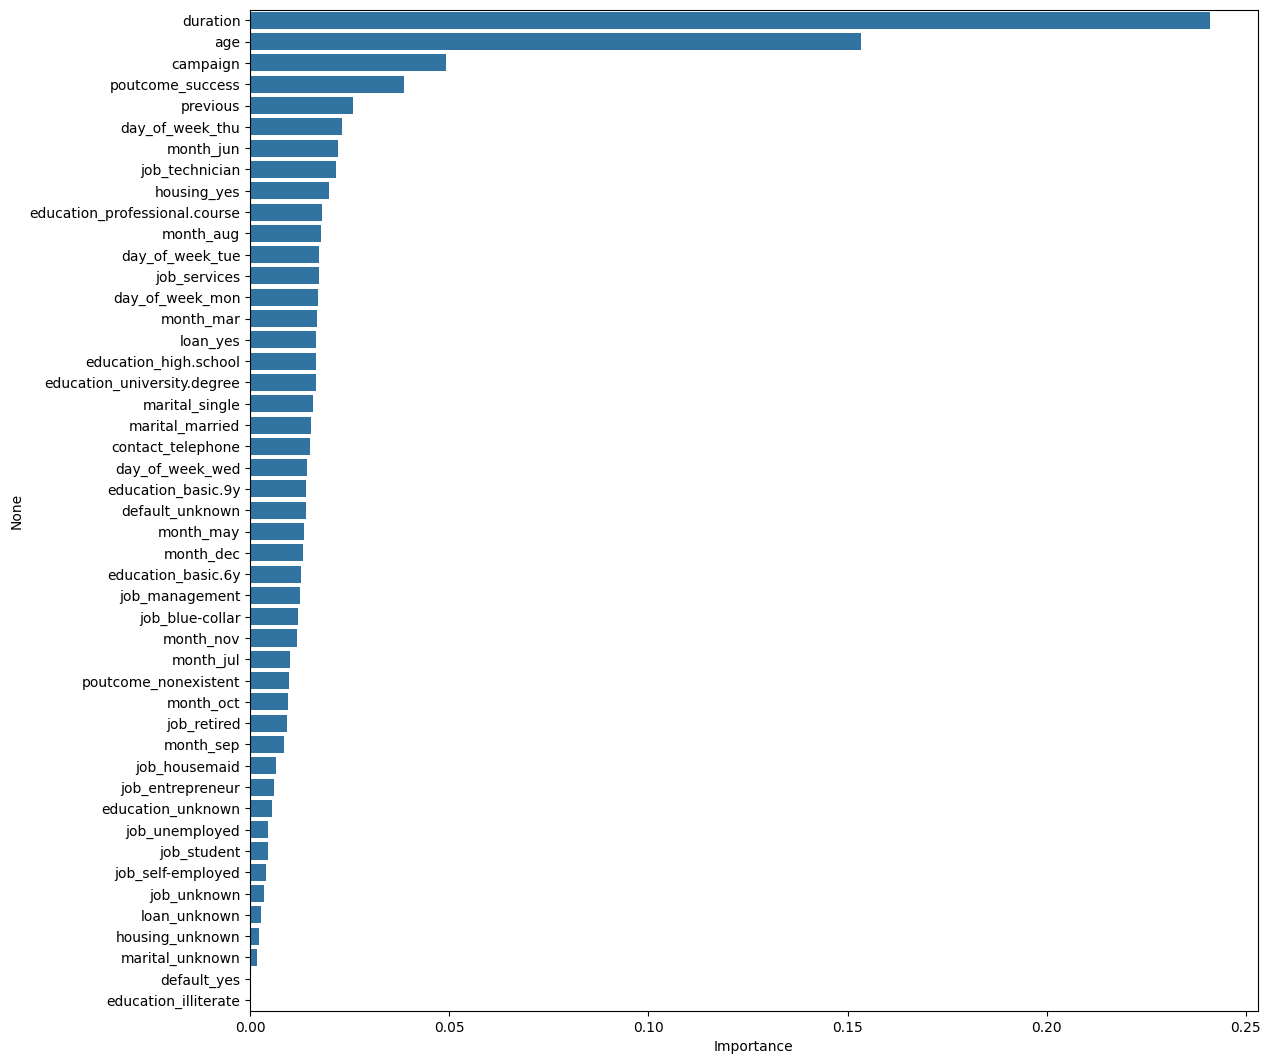

In [40]:
# Plotting feature importance
importances = rf_estimator_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x=importance_df.Importance, y=importance_df.index);

# Logistic Regression

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     25583
           1       0.69      0.02      0.04      3248

    accuracy                           0.89     28831
   macro avg       0.79      0.51      0.49     28831
weighted avg       0.87      0.89      0.84     28831



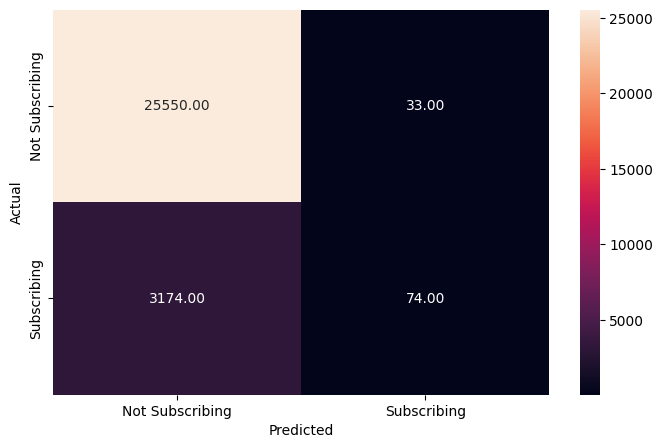

In [41]:
# Fitting the Random Forest classifier on the training data
logistic_estimator = LogisticRegression(class_weight = {0: 0.89, 1: 0.11}, random_state = 1)

logistic_estimator.fit(x_train, y_train)

# Checking performance on the training data
y_pred_train_lr = logistic_estimator.predict(x_train)

metrics_score(y_train, y_pred_train_lr)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10965
           1       0.61      0.02      0.04      1392

    accuracy                           0.89     12357
   macro avg       0.75      0.51      0.49     12357
weighted avg       0.86      0.89      0.84     12357



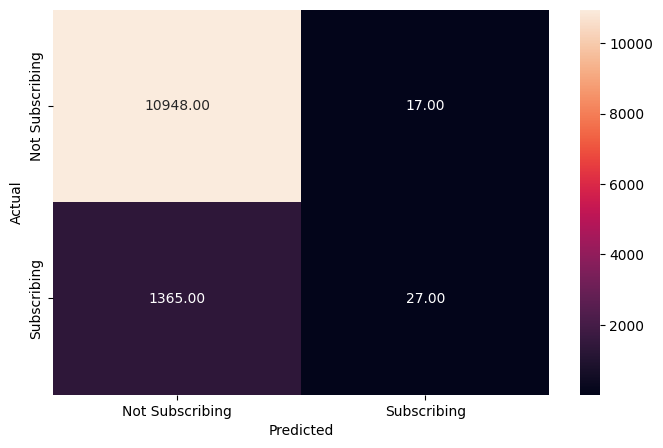

In [42]:
# Checking performance on the testing data
y_pred_test_lr = logistic_estimator.predict(x_test)

metrics_score(y_test, y_pred_test_lr)

In [43]:
lr_estimator_test = model_performance_classification(logistic_estimator,x_test,y_test)
lr_estimator_test

,Precision,Recall,Accuracy
0,0.751389,0.508923,0.888161


# Support Vector Machines

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     25583
           1       0.00      0.00      0.00      3248

    accuracy                           0.89     28831
   macro avg       0.44      0.50      0.47     28831
weighted avg       0.79      0.89      0.83     28831



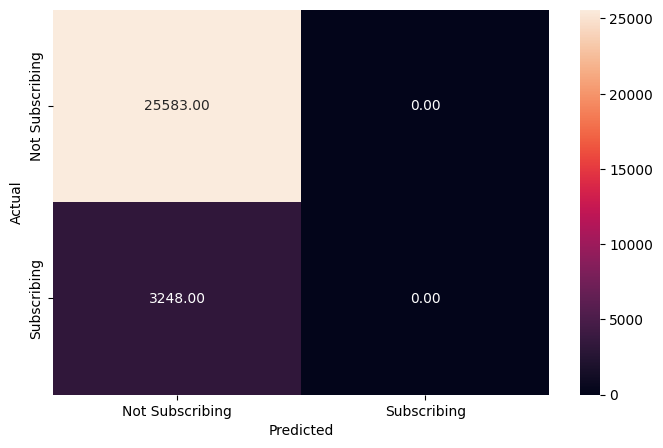

In [44]:
#Create an SVM classifier with class weights
svm_model = SVC(class_weight = {0: 0.89, 1: 0.11}, random_state = 1)

#Train the model
svm_model.fit(x_train, y_train)

# Checking performance on the training data
y_pred_train_svm = svm_model.predict(x_train)

metrics_score(y_train, y_pred_train_svm)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10965
           1       0.00      0.00      0.00      1392

    accuracy                           0.89     12357
   macro avg       0.44      0.50      0.47     12357
weighted avg       0.79      0.89      0.83     12357



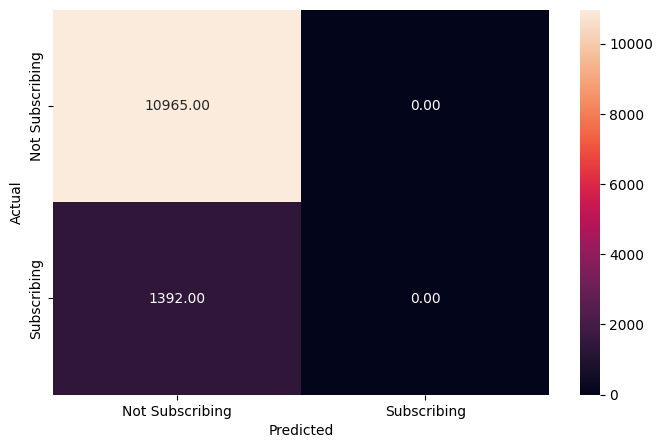

In [45]:
# Checking performance on the testing data
y_pred_test_svm = svm_model.predict(x_test)

metrics_score(y_test, y_pred_test_svm)

In [46]:
svm_estimator_test = model_performance_classification(svm_model,x_test,y_test)
svm_estimator_test

,Precision,Recall,Accuracy
0,0.443676,0.5,0.887351


# K-nearest Neighbors

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25583
           1       1.00      1.00      1.00      3248

    accuracy                           1.00     28831
   macro avg       1.00      1.00      1.00     28831
weighted avg       1.00      1.00      1.00     28831



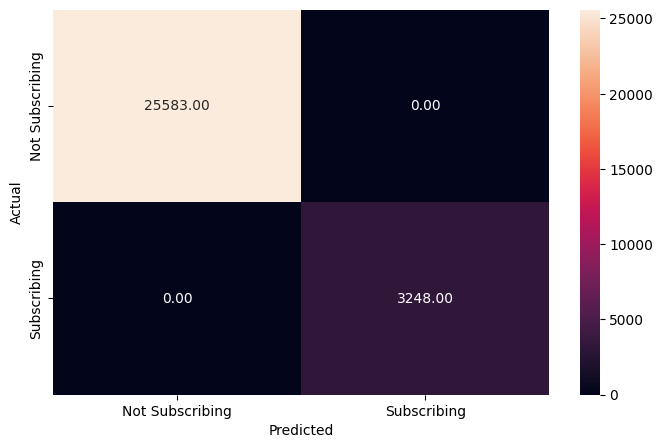

In [47]:
#Create an KNN classifier with class weights
knn_model = KNeighborsClassifier(weights = 'distance')

#Train the model
knn_model.fit(x_train, y_train)

# Checking performance on the training data
y_pred_train_knn = knn_model.predict(x_train)

metrics_score(y_train, y_pred_train_knn)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10965
           1       0.50      0.25      0.33      1392

    accuracy                           0.89     12357
   macro avg       0.70      0.61      0.63     12357
weighted avg       0.86      0.89      0.87     12357



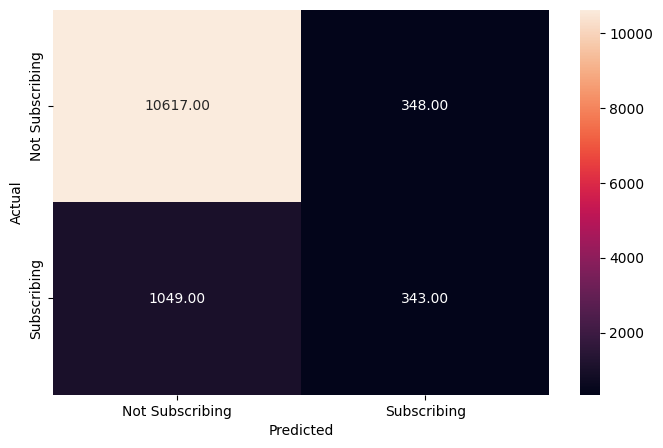

In [48]:
# Checking performance on the testing data
y_pred_test_knn = knn_model.predict(x_test)

metrics_score(y_test, y_pred_test_knn)

In [49]:
knn_estimator_test = model_performance_classification(knn_model,x_test,y_test)
knn_estimator_test

,Precision,Recall,Accuracy
0,0.703231,0.607335,0.886947


# Compilation and Conclusions

In [50]:
compiled_results = pd.concat(
    [dtree_perf, dtree_tuned_test, rf_estimator_test, rf_estimator_tuned_test, lr_estimator_test, svm_estimator_test, knn_estimator_test], axis=0, keys=['Decision Tree', 'Decision Tree Tuned', 'Random Forest', ' Random Forest Tuned','Logistic Regression', 'SVM', 'K-Nearest Neighbors']).reset_index().drop('level_1', axis=1).rename(columns={'level_0': 'Model'})
compiled_results

,Model,Precision,Recall,Accuracy
0,Decision Tree,0.694725,0.710624,0.876022
1,Decision Tree Tuned,0.824590,0.542628,0.897249
2,Random Forest,0.790330,0.689893,0.908797
3,Random Forest Tuned,0.734749,0.708356,0.897249
4,Logistic Regression,0.751389,0.508923,0.888161
5,SVM,0.443676,0.500000,0.887351
6,K-Nearest Neighbors,0.703231,0.607335,0.886947


Based on the classification model performance metrics, here are some insights regarding predicting whether a client will subscribe to a term deposit:

1. Choosing the Best Model
	•	Random Forest (Default) has the highest accuracy (90.87%) and balanced precision (0.79) and recall (0.69). This indicates it makes overall the most correct predictions.
	•	Decision Tree Tuned has the highest precision (0.82), meaning it’s the best at avoiding false positives (incorrectly predicting a subscription).
	•	Random Forest Tuned has the highest recall (0.70), meaning it’s better at capturing actual subscriptions (minimizing false negatives).

2. Business Implications of Precision and Recall
	•	If the business prioritizes correctly identifying clients who will subscribe (minimizing false negatives), a model with high recall (like Random Forest Tuned) would be preferable.
	•	If the business wants to avoid marketing efforts on unlikely customers (minimizing false positives), a model with high precision (like Decision Tree Tuned) is better.
	•	Random Forest (Default) offers a good balance between precision and recall, making it the best all-around choice.

3. Consideration for Business Decisions
	•	If marketing costs are high, choosing a high-precision model (Decision Tree Tuned) ensures outreach is focused on likely subscribers.
	•	If missing potential subscribers is a bigger risk, a high-recall model (Random Forest Tuned) ensures more potential clients are targeted.

4. Performance of Other Models
	•	Logistic Regression performs reasonably well (Accuracy: 88.81%), which may suggest that a linear decision boundary is somewhat effective.
	•	SVM performs the worst in precision and recall, indicating it struggles with this dataset.

Conclusion

For predicting client subscription:
	•	Random Forest (Default) is the best overall model for balanced prediction.
	•	Decision Tree Tuned is best for targeting highly likely subscribers with fewer false positives.
	•	Random Forest Tuned is best for capturing most actual subscribers, even if it increases false positives.


In [51]:
sys.exit()

SystemExit: 